In [1]:
import pandas as pd
import glob

## Print best models (validation) for each run in './models/'

In [2]:
metric='dice_score'
for csv in glob.glob('models/*/log_valid.csv'):
    modelname = csv.split('/')[1]
    pdcsv = pd.read_csv(csv)
    best = pdcsv.loc[pdcsv['dice_score'].idxmax()]
    print("Model: {} - Best {} {} at epoch {}".format(modelname, metric, best['dice_score'], best['epoch']))

Model: Custom_MultiFOV_brats_on_FLAIR - Best dice_score 0.8269016742706299 at epoch 159
Model: Segan_IO_TF2_brats_on_T2 - Best dice_score 0.7209994792938232 at epoch 182
Model: Segan_IO_TF2_brats_on_T1c - Best dice_score 0.6112254858016968 at epoch 1011
Model: Segan_IO_TF2_bd2decide_on_T2 - Best dice_score 0.164668008685112 at epoch 3
Model: Segan_IO_TF2_bd2decide_on_T2_alt500 - Best dice_score 0.15607543289661407 at epoch 5
Model: Segan_IO_TF2_brats_on_T1_alt50 - Best dice_score 0.6210064888000488 at epoch 1426
Model: Segan_IO_TF2_bd2decide_on_T1 - Best dice_score 0.20200926065444946 at epoch 2
Model: Segan_IO_TF2_brats_on_T1 - Best dice_score 0.5665786266326904 at epoch 861
Model: Segan_IO_TF2_brats_on_FLAIR - Best dice_score 0.8281170129776001 at epoch 168
Model: Transfer_Brats_Flair_to_T1 - Best dice_score 0.5223069190979004 at epoch 273
Model: Transfer_Brats_Flair_to_T1_freeze_all - Best dice_score 0.6193402409553528 at epoch 1122
Model: transfer_bratsT2_to_B2D-freeze_all - Best d

In [3]:
from DeepMRI import DeepMRI

In [4]:
import SegAN_arch as segan_original
import SegAN_IO_arch as seganio

In [ ]:
original = DeepMRI(batch_size=64, size=160, mri_channels=4, model_name="Segan_TF2_brats_ALL")
original.load_dataset(dataset='brats', mri_types=["MR_T1", "MR_T1c", "MR_T2", "MR_Flair"])
original.build_model(load_model='models/Segan_TF2_brats_ALL/best_dice_score_1386-13', seed=1234567890, arch=segan_original)
original.evaluate('results/Segan_TF2_brats_ALL_1386_valid.csv', 'validation')
original.evaluate('results/Segan_TF2_brats_ALL_1386_test.csv', 'testing')

In [ ]:
our_all = DeepMRI(batch_size=64, size=160, mri_channels=4, model_name="Segan_IO_TF2_brats_ALL")
our_all.load_dataset(dataset='brats', mri_types=["MR_T1", "MR_T1c", "MR_T2", "MR_Flair"])
our_all.build_model(load_model='models/Segan_IO_TF2_brats_ALL/best_dice_score_1123-51', seed=1234567890, arch=seganio)
our_all.evaluate('results/Segan_IO_TF2_brats_ALL_1123_valid.csv', 'validation')
our_all.evaluate('results/Segan_IO_TF2_brats_ALL_1123_test.csv', 'testing')

In [5]:
model_name = "Segan_IO_TF2_brats_on_FLAIR"
model_epoch = 168
model_checkpoint = 'models/' + model_name + '/' + 'best_dice_score_168-29'
mri_types = ["MR_Flair"]
dataset = 'brats'

model = DeepMRI(batch_size=64, size=160, mri_channels=len(mri_types), model_name=model_name)
model.load_dataset(dataset=dataset, mri_types=mri_types)
model.build_model(load_model=model_checkpoint, seed=1234567890, arch=seganio)
model.evaluate('results/'+model_name+'_'+ str(model_epoch) + '_valid.csv', 'validation')
model.evaluate('results/'+model_name+'_'+ str(model_epoch) + '_test.csv', 'testing')


Loading dataset brats with modalities MR_Flair
Done.
Using architecture: SegAN_IO_arch
Loaded history from models/Segan_IO_TF2_brats_on_FLAIR/log_train.csv
Loaded history from models/Segan_IO_TF2_brats_on_FLAIR/log_valid.csv
Loading models/Segan_IO_TF2_brats_on_FLAIR/best_dice_score_168-29


W0918 15:10:06.981053 139757717718848 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/data/util/random_seed.py:58: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Loaded model from: models/Segan_IO_TF2_brats_on_FLAIR/best_dice_score_168-29, next epoch: 679
     55/Unknown - 15s 265ms/step - loss_g: 0.2808 - loss_d: -0.0649 - sensitivity: 0.8608 - specificity: 0.9983 - false_positive_rate: 0.0017 - precision: 0.9271 - dice_score: 0.8927 - balanced_accuracy: 0.9295 - smooth_dice_loss: 0.2160 - mae: 0.0051

[0.37065366,
 -0.11937185,
 0.7504252,
 0.9960049,
 0.003994911,
 0.8782691,
 0.8025242,
 0.8732151,
 0.2512817,
 0.01468059]

In [6]:
model_name = "Segan_IO_TF2_brats_on_T1"
model_epoch = 861
model_checkpoint = 'models/' + model_name + '/' + 'best_dice_score_861-45'
mri_types = ["MR_T1"]
dataset = 'brats'

model = DeepMRI(batch_size=64, size=160, mri_channels=len(mri_types), model_name=model_name)
model.load_dataset(dataset=dataset, mri_types=mri_types)
model.build_model(load_model=model_checkpoint, seed=1234567890, arch=seganio)
model.evaluate('results/'+model_name+'_'+ str(model_epoch) + '_valid.csv', 'validation')
model.evaluate('results/'+model_name+'_'+ str(model_epoch) + '_test.csv', 'testing')

Loading dataset brats with modalities MR_T1
Done.
Using architecture: SegAN_IO_arch


W0918 15:10:43.195557 139757717718848 util.py:244] Unresolved object in checkpoint: (root).d_optimizer.iter
W0918 15:10:43.196851 139757717718848 util.py:244] Unresolved object in checkpoint: (root).d_optimizer.decay
W0918 15:10:43.197743 139757717718848 util.py:244] Unresolved object in checkpoint: (root).d_optimizer.learning_rate
W0918 15:10:43.198590 139757717718848 util.py:244] Unresolved object in checkpoint: (root).d_optimizer.momentum
W0918 15:10:43.199468 139757717718848 util.py:244] Unresolved object in checkpoint: (root).d_optimizer.rho
W0918 15:10:43.200349 139757717718848 util.py:252] A checkpoint was restored (e.g. tf.train.Checkpoint.restore or tf.keras.Model.load_weights) but not all checkpointed values were used. See above for specific issues. Use expect_partial() on the load status object, e.g. tf.train.Checkpoint.restore(...).expect_partial(), to silence these warnings, or use assert_consumed() to make the check explicit. See https://www.tensorflow.org/alpha/guide/che

Loaded history from models/Segan_IO_TF2_brats_on_T1/log_train.csv
Loaded history from models/Segan_IO_TF2_brats_on_T1/log_valid.csv
Loading models/Segan_IO_TF2_brats_on_T1/best_dice_score_861-45
Loaded model from: models/Segan_IO_TF2_brats_on_T1/best_dice_score_861-45, next epoch: 1127
     55/Unknown - 15s 266ms/step - loss_g: 1.1303 - loss_d: -0.3915 - sensitivity: 0.1420 - specificity: 0.9949 - false_positive_rate: 0.0051 - precision: 0.4136 - dice_score: 0.2115 - balanced_accuracy: 0.5685 - smooth_dice_loss: 0.7388 - mae: 0.0263

[1.1363714,
 -0.6970941,
 0.5893981,
 0.98047155,
 0.0195284,
 0.56555074,
 0.56191784,
 0.7849349,
 0.43927717,
 0.034241624]

In [7]:
model_name = "Segan_IO_TF2_brats_on_T1c"
model_epoch = 1011
model_checkpoint = 'models/' + model_name + '/' + 'best_dice_score_1011-48'
mri_types = ["MR_T1c"]
dataset = 'brats'

model = DeepMRI(batch_size=64, size=160, mri_channels=len(mri_types), model_name=model_name)
model.load_dataset(dataset=dataset, mri_types=mri_types)
model.build_model(load_model=model_checkpoint, seed=1234567890, arch=seganio)
model.evaluate('results/'+model_name+'_'+ str(model_epoch) + '_valid.csv', 'validation')
model.evaluate('results/'+model_name+'_'+ str(model_epoch) + '_test.csv', 'testing')

Loading dataset brats with modalities MR_T1c


W0918 15:11:13.571243 139757717718848 util.py:244] Unresolved object in checkpoint: (root).d_optimizer.iter
W0918 15:11:13.572699 139757717718848 util.py:244] Unresolved object in checkpoint: (root).d_optimizer.decay
W0918 15:11:13.573829 139757717718848 util.py:244] Unresolved object in checkpoint: (root).d_optimizer.learning_rate
W0918 15:11:13.574870 139757717718848 util.py:244] Unresolved object in checkpoint: (root).d_optimizer.momentum
W0918 15:11:13.575880 139757717718848 util.py:244] Unresolved object in checkpoint: (root).d_optimizer.rho
W0918 15:11:13.576885 139757717718848 util.py:252] A checkpoint was restored (e.g. tf.train.Checkpoint.restore or tf.keras.Model.load_weights) but not all checkpointed values were used. See above for specific issues. Use expect_partial() on the load status object, e.g. tf.train.Checkpoint.restore(...).expect_partial(), to silence these warnings, or use assert_consumed() to make the check explicit. See https://www.tensorflow.org/alpha/guide/che

Done.
Using architecture: SegAN_IO_arch
Loaded history from models/Segan_IO_TF2_brats_on_T1c/log_train.csv
Loaded history from models/Segan_IO_TF2_brats_on_T1c/log_valid.csv
Loading models/Segan_IO_TF2_brats_on_T1c/best_dice_score_1011-48
Loaded model from: models/Segan_IO_TF2_brats_on_T1c/best_dice_score_1011-48, next epoch: 1439
     55/Unknown - 15s 269ms/step - loss_g: 1.2146 - loss_d: -0.4297 - sensitivity: 0.2040 - specificity: 0.9900 - false_positive_rate: 0.0100 - precision: 0.3420 - dice_score: 0.2556 - balanced_accuracy: 0.5970 - smooth_dice_loss: 0.7849 - mae: 0.0295

[0.8535684,
 -0.4551379,
 0.61699086,
 0.9886579,
 0.011342036,
 0.6791833,
 0.63402075,
 0.8028245,
 0.3984304,
 0.02569068]

In [8]:
model_name = "Segan_IO_TF2_brats_on_T2"
model_epoch = 182
model_checkpoint = 'models/' + model_name + '/' + 'best_dice_score_182-25'
mri_types = ["MR_T2"]
dataset = 'brats'

model = DeepMRI(batch_size=64, size=160, mri_channels=len(mri_types), model_name=model_name)
model.load_dataset(dataset=dataset, mri_types=mri_types)
model.build_model(load_model=model_checkpoint, seed=1234567890, arch=seganio)
model.evaluate('results/'+model_name+'_'+ str(model_epoch) + '_valid.csv', 'validation')
model.evaluate('results/'+model_name+'_'+ str(model_epoch) + '_test.csv', 'testing')

Loading dataset brats with modalities MR_T2
Done.
Using architecture: SegAN_IO_arch
Loaded history from models/Segan_IO_TF2_brats_on_T2/log_train.csv
Loaded history from models/Segan_IO_TF2_brats_on_T2/log_valid.csv
Loading models/Segan_IO_TF2_brats_on_T2/best_dice_score_182-25
Loaded model from: models/Segan_IO_TF2_brats_on_T2/best_dice_score_182-25, next epoch: 666
     53/Unknown - 14s 269ms/step - loss_g: 0.2591 - loss_d: -0.0796 - sensitivity: 0.7476 - specificity: 0.9951 - false_positive_rate: 0.0049 - precision: 0.8013 - dice_score: 0.7735 - balanced_accuracy: 0.8713 - smooth_dice_loss: 0.1795 - mae: 0.0114

W0918 15:12:04.720747 139757717718848 util.py:244] Unresolved object in checkpoint: (root).d_optimizer.iter
W0918 15:12:04.722067 139757717718848 util.py:244] Unresolved object in checkpoint: (root).d_optimizer.decay
W0918 15:12:04.722964 139757717718848 util.py:244] Unresolved object in checkpoint: (root).d_optimizer.learning_rate
W0918 15:12:04.723829 139757717718848 util.py:244] Unresolved object in checkpoint: (root).d_optimizer.momentum
W0918 15:12:04.724724 139757717718848 util.py:244] Unresolved object in checkpoint: (root).d_optimizer.rho
W0918 15:12:04.725581 139757717718848 util.py:252] A checkpoint was restored (e.g. tf.train.Checkpoint.restore or tf.keras.Model.load_weights) but not all checkpointed values were used. See above for specific issues. Use expect_partial() on the load status object, e.g. tf.train.Checkpoint.restore(...).expect_partial(), to silence these warnings, or use assert_consumed() to make the check explicit. See https://www.tensorflow.org/alpha/guide/che

     55/Unknown - 15s 270ms/step - loss_g: 0.3088 - loss_d: -0.0725 - sensitivity: 0.8499 - specificity: 0.9940 - false_positive_rate: 0.0060 - precision: 0.7824 - dice_score: 0.8147 - balanced_accuracy: 0.9219 - smooth_dice_loss: 0.2363 - mae: 0.0096

[0.4009847,
 -0.1249705,
 0.758274,
 0.99038166,
 0.009618302,
 0.77593154,
 0.75653976,
 0.8743278,
 0.27601415,
 0.0193854]

In [9]:
model_name = "Transfer_Brats_Flair_to_T1_freeze_all"
model_epoch = 1122
model_checkpoint = 'models/' + model_name + '/' + 'best_dice_score_1122-84'
mri_types = ["MR_T1"]
dataset = 'brats'

model = DeepMRI(batch_size=64, size=160, mri_channels=len(mri_types), model_name=model_name)
model.load_dataset(dataset=dataset, mri_types=mri_types)
model.build_model(load_model=model_checkpoint, seed=1234567890, arch=seganio)
model.evaluate('results/'+model_name+'_'+ str(model_epoch) + '_valid.csv', 'validation')
model.evaluate('results/'+model_name+'_'+ str(model_epoch) + '_test.csv', 'testing')

Loading dataset brats with modalities MR_T1
Done.
Using architecture: SegAN_IO_arch
Loaded history from models/Transfer_Brats_Flair_to_T1_freeze_all/log_train.csv
Loaded history from models/Transfer_Brats_Flair_to_T1_freeze_all/log_valid.csv
Loading models/Transfer_Brats_Flair_to_T1_freeze_all/best_dice_score_1122-84
Loaded model from: models/Transfer_Brats_Flair_to_T1_freeze_all/best_dice_score_1122-84, next epoch: 1397
     55/Unknown - 15s 267ms/step - loss_g: 0.9535 - loss_d: -0.1166 - sensitivity: 0.1565 - specificity: 0.9937 - false_positive_rate: 0.0063 - precision: 0.3881 - dice_score: 0.2231 - balanced_accuracy: 0.5751 - smooth_dice_loss: 0.8369 - mae: 0.0271

[0.5816225,
 -0.15584995,
 0.64079475,
 0.98220736,
 0.017792407,
 0.6025832,
 0.6055316,
 0.81150097,
 0.4257726,
 0.030729229]

In [10]:
model_name = "Transfer_Brats_Flair_to_T1"
model_epoch = 273
model_checkpoint = 'models/' + model_name + '/' + 'best_dice_score_273-59'
mri_types = ["MR_T1"]
dataset = 'brats'

model = DeepMRI(batch_size=64, size=160, mri_channels=len(mri_types), model_name=model_name)
model.load_dataset(dataset=dataset, mri_types=mri_types)
model.build_model(load_model=model_checkpoint, seed=1234567890, arch=seganio)
model.evaluate('results/'+model_name+'_'+ str(model_epoch) + '_valid.csv', 'validation')
model.evaluate('results/'+model_name+'_'+ str(model_epoch) + '_test.csv', 'testing')

Loading dataset brats with modalities MR_T1


W0918 15:12:52.405236 139757717718848 util.py:244] Unresolved object in checkpoint: (root).d_optimizer.iter
W0918 15:12:52.406648 139757717718848 util.py:244] Unresolved object in checkpoint: (root).d_optimizer.decay
W0918 15:12:52.407556 139757717718848 util.py:244] Unresolved object in checkpoint: (root).d_optimizer.learning_rate
W0918 15:12:52.408512 139757717718848 util.py:244] Unresolved object in checkpoint: (root).d_optimizer.momentum
W0918 15:12:52.409354 139757717718848 util.py:244] Unresolved object in checkpoint: (root).d_optimizer.rho
W0918 15:12:52.410223 139757717718848 util.py:252] A checkpoint was restored (e.g. tf.train.Checkpoint.restore or tf.keras.Model.load_weights) but not all checkpointed values were used. See above for specific issues. Use expect_partial() on the load status object, e.g. tf.train.Checkpoint.restore(...).expect_partial(), to silence these warnings, or use assert_consumed() to make the check explicit. See https://www.tensorflow.org/alpha/guide/che

Done.
Using architecture: SegAN_IO_arch
Loaded history from models/Transfer_Brats_Flair_to_T1/log_train.csv
Loaded history from models/Transfer_Brats_Flair_to_T1/log_valid.csv
Loading models/Transfer_Brats_Flair_to_T1/best_dice_score_273-59
Loaded model from: models/Transfer_Brats_Flair_to_T1/best_dice_score_273-59, next epoch: 886
     55/Unknown - 15s 267ms/step - loss_g: 1.0309 - loss_d: -0.2268 - sensitivity: 0.1398 - specificity: 0.9902 - false_positive_rate: 0.0098 - precision: 0.2666 - dice_score: 0.1834 - balanced_accuracy: 0.5650 - smooth_dice_loss: 0.8041 - mae: 0.0309

[0.885533,
 -0.3990665,
 0.58236456,
 0.9720289,
 0.027971053,
 0.48686615,
 0.5104857,
 0.7771968,
 0.48646626,
 0.042921178]

In [3]:
merged_results = pd.DataFrame()
for path in glob.glob('results/*.csv'):
    if 'results_merged.csv' not in path:
        data = pd.read_csv(path)
        data['model'] = '_'.join(path.replace('results/', '').split('_')[:-2])
        data['epoch'] = int(path.replace('results/', '').split('_')[-2])
        data['run'] = path.replace('.csv', '').split('_')[-1]
        merged_results= merged_results.append(data, ignore_index=True)

In [32]:
merged_results.to_csv('results/results_merged.csv', index=False, index_label=False)

In [8]:
import seaborn as sb
import matplotlib.pyplot as plt

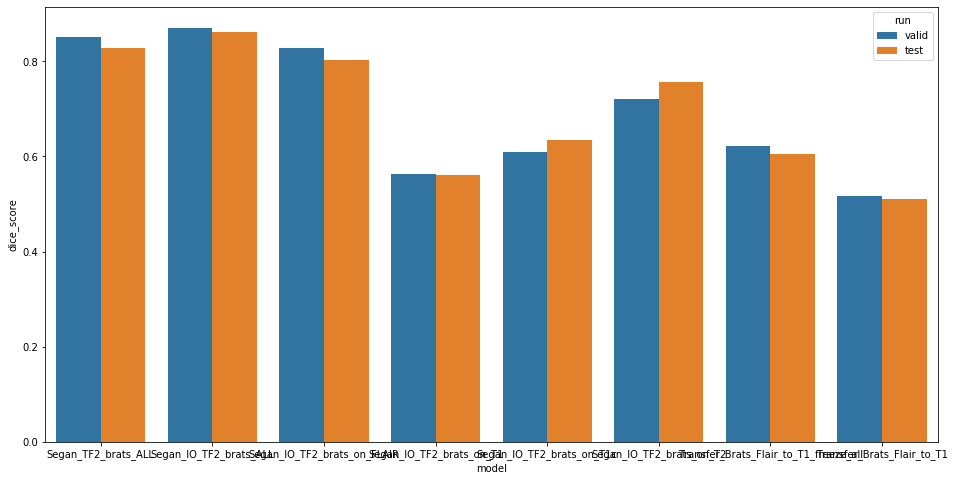

In [10]:
plt.figure(figsize=(16, 8))
sb.barplot(data=merged_results, y='dice_score', x='model', hue='run')

In [34]:
result_to_plot = merged_results.melt(id_vars=['model', 'run', 'epoch', 'datetime'])
result_to_plot = result_to_plot[result_to_plot['variable'].isin(['dice_score', 'precision', 'sensitivity'])]
result_to_plot = result_to_plot[result_to_plot['run']=='test']
base_models = result_to_plot[result_to_plot['model'].apply(lambda x: 'Transfer' not in x)]
transfer_models = result_to_plot[result_to_plot['model'].apply(lambda x: 'Transfer' not in x)]

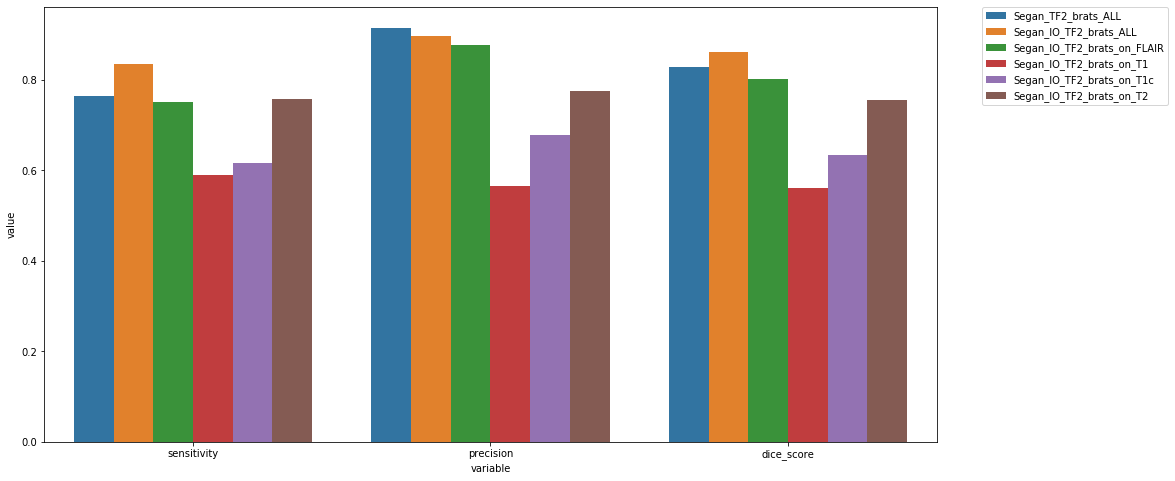

In [39]:
plt.figure(figsize=(16, 8))

sb.barplot(data=base_models, y='value', x='variable', hue='model')
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)